# CMPE 140
# Correlations and linear regression

Correlation
====
We say that two variables are _correlated_ when a change in one is associated with a change in the other.

Generate some synthetic data with random noise.

In [11]:
set.seed(6556)
x <- 1:20
y <- x + rnorm(20, sd=3)  # y is correlated with x
z <- sample(1:20,20)/2 + rnorm(20, sd=5)
df <- data.frame(x,y,z)

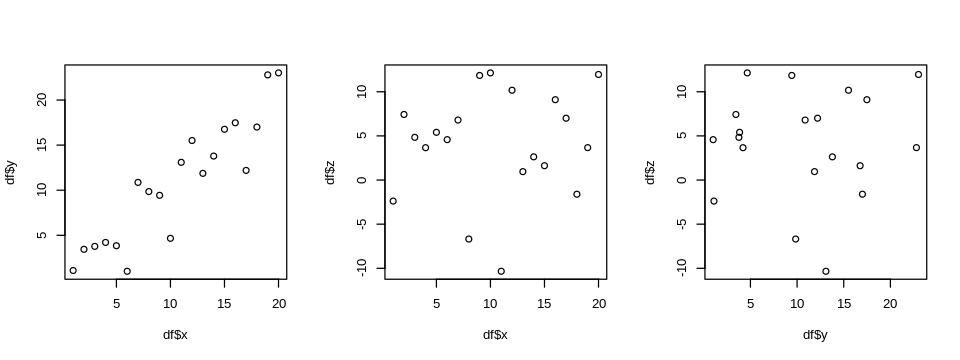

In [12]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
plot(df$x, df$y)
plot(df$x, df$z)
plot(df$y, df$z)

It appears that x and y are correlated positively, while z in not correlated with the rest.

Let's check this intuition by calculating the _Pearson correlation coefficient_. 

* values between -1 and 1.
* 1 = perfect positive correlation
* 0 = no correlation.

In [13]:
cor(df, method="pearson")

,x,y,z
x,1.0000000,0.91448499,0.11100764
y,0.9144850,1.00000000,0.04973288
z,0.1110076,0.04973288,1.00000000


The correlation coefficient between x and y is close to 1, and that between z and the others is small.

However, these results might be due to luck, resulting from the finite number of data we got. 

The _correlation test_ gives us a confidence interval about this result.

In [14]:
cor.test(df$x, df$y, method="pearson")


	Pearson's product-moment correlation

data:  df$x and df$y
t = 9.5888, df = 18, p-value = 1.697e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7927889 0.9660614
sample estimates:
     cor 
0.914485 


In [15]:
cor.test(df$x, df$z, method="pearson")


	Pearson's product-moment correlation

data:  df$x and df$z
t = 0.47389, df = 18, p-value = 0.6413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3486394  0.5276105
sample estimates:
      cor 
0.1110076 


Let's apply this to a real data set, the height and weight data for men and women which we have used before.

In [16]:
url <- "01_heights_weights_genders.csv"
heights_weights_gender <- read.table(url, header=T, sep=",")
men <- heights_weights_gender$Gender == "Male"
men_heights <- heights_weights_gender[["Height"]][men]
men_weights <- heights_weights_gender[["Weight"]][men]
women <- heights_weights_gender$Gender == "Female"
women_heights <- heights_weights_gender[["Height"]][women]
women_weights <- heights_weights_gender[["Weight"]][women]

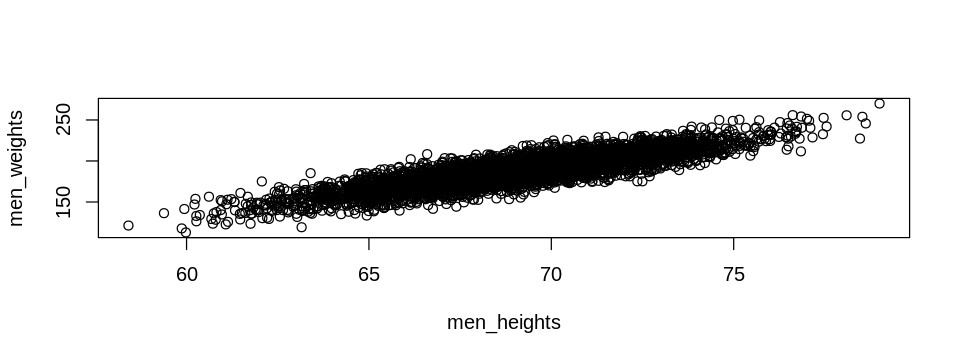

In [17]:
plot(men_heights, men_weights)

In [18]:
cor.test(men_heights,men_weights)


	Pearson's product-moment correlation

data:  men_heights and men_weights
t = 120.75, df = 4998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8557296 0.8698894
sample estimates:
      cor 
0.8629788 


In [19]:
cor.test(women_heights,women_weights)


	Pearson's product-moment correlation

data:  women_heights and women_weights
t = 113.88, df = 4998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8417121 0.8571417
sample estimates:
      cor 
0.8496086 


Correlation does not always mean causation
----
If A and B are correlated, this **might** mean there is a causal link between them
* A causes B, e.g. rain and crop growth.
* A and B influence each other; e.g., rain causes tree growth, and large forests cause rain.

However, correlation can also exist without causation.

* Both A and B are may be influenced by another factor
  
  <img src="https://images.ctfassets.net/vrkkgjbn4fsk/4jgRRfpWg8EmgIoOIWiESA/350c521581448aa5993ca54b91fdf651/1-causation-vs-correlation-germ-theory.png" width="30%">

* Pure luck, no causation.

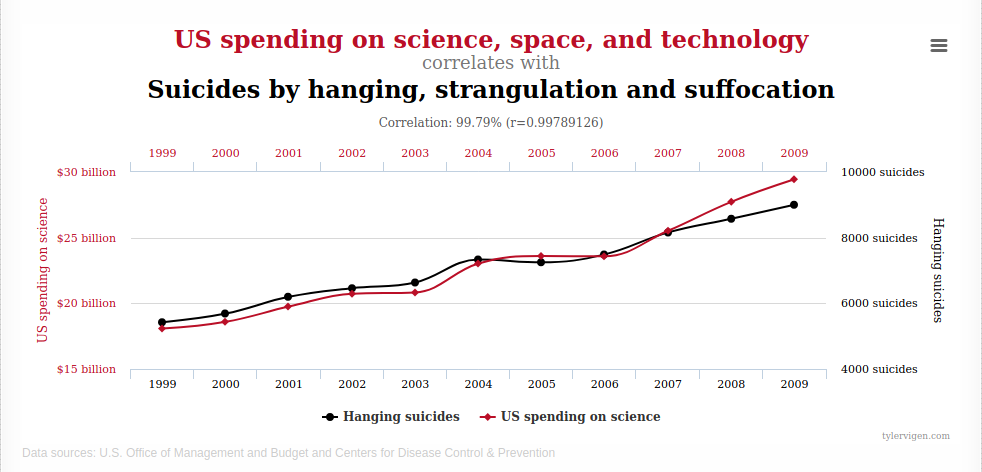
    ([Source](http://www.tylervigen.com/spurious-correlations))

# The Anscombe Quartet

Correlation is a summary statistic. It can hide important features of data.

A famous example is the _Anscombe_ data set, which illustrates that very different data can lead to the same correlation coefficient.

In [20]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


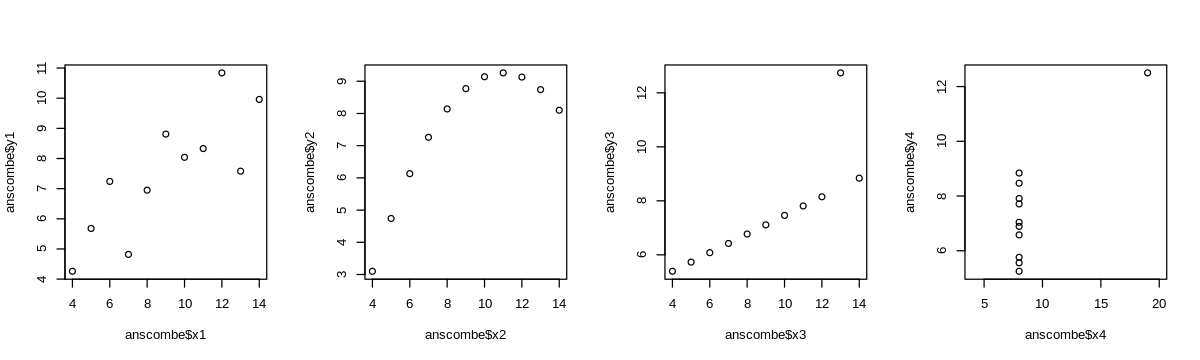

In [21]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow = c(1,4))
plot(anscombe$x1, anscombe$y1)
plot(anscombe$x2, anscombe$y2)
plot(anscombe$x3, anscombe$y3)
plot(anscombe$x4, anscombe$y4,xlim=c(4,20))

Despite fundamental differences, the correlation coefficient for each pair of variables is the same.

In [22]:
cor(anscombe$x1, anscombe$y1)
cor(anscombe$x2, anscombe$y2)
cor(anscombe$x3, anscombe$y3)
cor(anscombe$x4, anscombe$y4)

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214

Linear regression
====

When we discover a correlation between two variables $x$ and $y$, we may want to find out a _formula_ for the relation between them. That way, we can predict the outcome of unobserved input values.

If we _assume_ a linear relationship $y=ax+b$. Then, given the observations $(x_1,y_1),\ldots,(x_n,y_n)$, the statistical procedure to determine the coefficients $a$ and $b$ is called _linear regression_.

Once we have some estimates $\hat{a}$ and $\hat{b}$ for the parameters, when we get a new input value $x$, we can predict the outcome as $y=\hat{a}x + \hat{b}$.

Let's create a synthetic data set again.

In [23]:
set.seed(1235)
x <- 1:10 + rnorm(10,sd=2)
y <- x + rnorm(10, sd=3)  # y is correlated with x
df <- data.frame(x,y)
df

x,y
-0.3959759,-3.217074
-0.5697077,2.685184
4.9799180,2.729447
4.2235517,2.958473
5.2284153,2.758888
9.3963930,10.634494
7.0956912,8.935584
9.3097248,7.947907
11.7305673,9.731882
10.8051459,11.754786


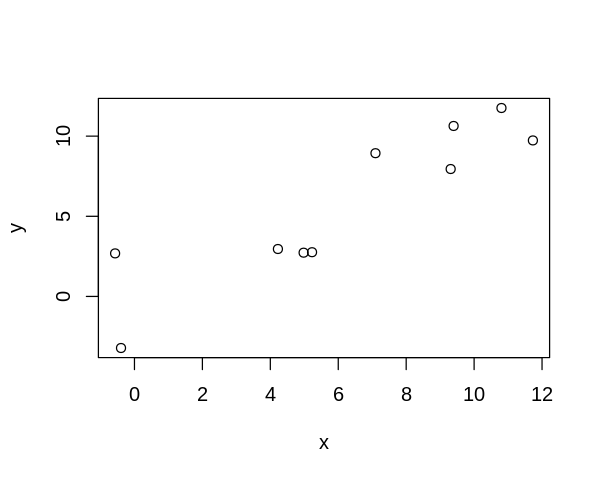

In [24]:
options(repr.plot.width=5, repr.plot.height=4)
plot(x,y)

Our purpose is to draw a line such that the distances between given points and the line are minimized. R provides a function `lm()` (for "linear model") that performs this task.

In [25]:
linmodel <- lm(y~x, data=df)
linmodel


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
    -0.4448       0.9929  


We see a nonzero intercept, even though we expect zero. Is this a significant result?

In [26]:
summary(linmodel)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3791 -1.6957 -0.8209  1.6796  3.6956 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4448     1.2884  -0.345 0.738831    
x             0.9929     0.1737   5.716 0.000446 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.253 on 8 degrees of freedom
Multiple R-squared:  0.8033,	Adjusted R-squared:  0.7787 
F-statistic: 32.67 on 1 and 8 DF,  p-value: 0.000446


In [27]:
confint(linmodel)

,2.5 %,97.5 %
(Intercept),-3.4158320,2.526273
x,0.5923686,1.393511


The resulting line can be plotted with the `abline()` function.

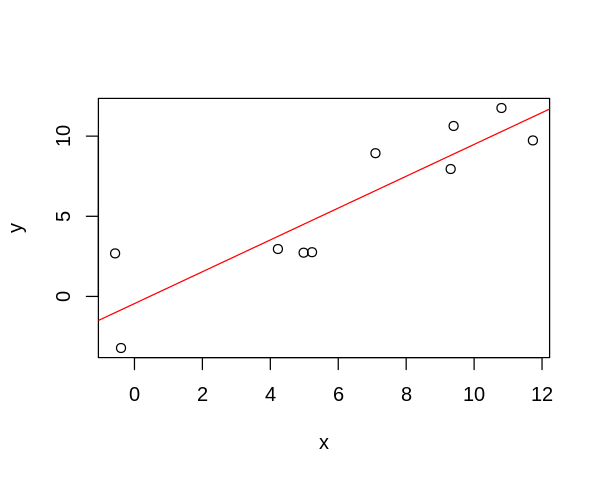

In [28]:
plot(x,y)
abline(linmodel, col="red")

Let's make a prediction for $x=25,26,\ldots,30$.

In [29]:
newx <- 25:30
predict.lm(linmodel, data.frame(x=newx))

1        2        3        4        5        6 
24.37871 25.37165 26.36459 27.35753 28.35047 29.34341

Linear regression of height and weight data
----

In [30]:
df <- data.frame(men_heights,men_weights,women_heights,women_weights)
men_hw_model <- lm("men_weights ~ men_heights", data=df)
women_hw_model <- lm("women_weights ~ women_heights", data=df)

In [31]:
men_hw_model


Call:
lm(formula = "men_weights ~ men_heights", data = df)

Coefficients:
(Intercept)  men_heights  
   -224.499        5.962  


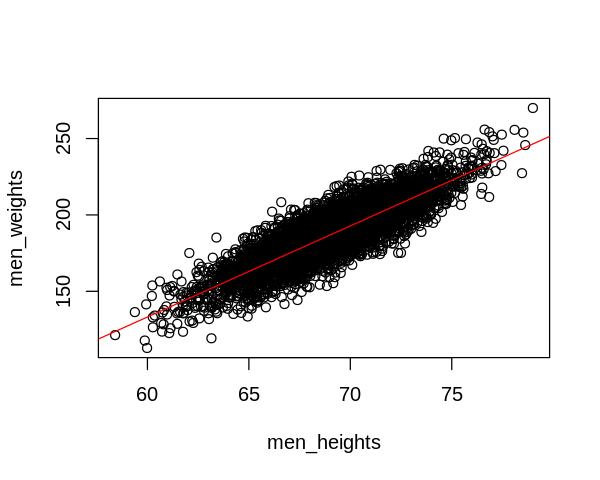

In [32]:
plot(men_heights,men_weights)
abline(men_hw_model,col="red")


Call:
lm(formula = "women_weights ~ women_heights", data = df)

Coefficients:
  (Intercept)  women_heights  
     -246.013          5.994  


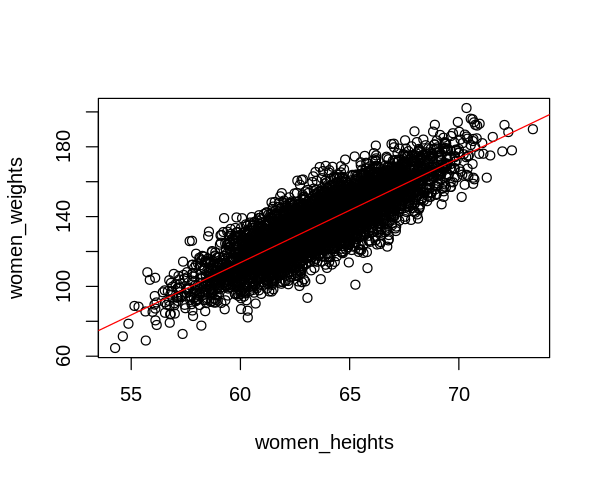

In [33]:
women_hw_model
plot(women_heights,women_weights)
abline(women_hw_model,col="red")

Linear regression with multiple variables
----

Our linear model can involve two independent variables: 
$$y = a_0 + a_1x_1 + a_2 x_2$$

In [34]:
set.seed(1234)
x1 <- sample(1:20,20) + rnorm(20,sd=2)
x2 <- sample(1:20,20)/2 + rnorm(20, sd=5)

y <- 0 + 1*x1 + 2*x2 + rnorm(10, sd=3)
df <- data.frame(x1,x2,y)
df

x1,x2,y
12.625346,-2.2599294,12.208969
3.745128,5.8808594,19.495541
12.036633,7.5157502,28.077552
16.410487,-4.0301563,8.370853
7.705962,5.0896204,16.518797
20.736362,1.9555519,23.547894
6.751271,-2.0748100,4.546511
4.620524,0.6884524,12.208242
2.010014,7.3152791,16.180377
6.924739,14.7390874,32.230811


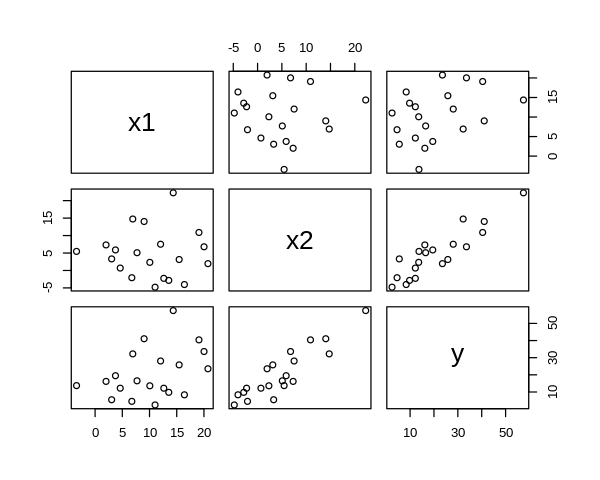

In [35]:
plot(df)

In [37]:
linmodel2 <- lm(y~x1+x2, data=df)
linmodel2
confint(linmodel2)


Call:
lm(formula = y ~ x1 + x2, data = df)

Coefficients:
(Intercept)           x1           x2  
     2.7540       0.8876       1.8784  


,2.5 %,97.5 %
(Intercept),-0.1173064,5.625245
x1,0.6656861,1.109491
x2,1.6702903,2.086563


# Linear regression with polynomials

Assuming that $y=a_0 + a_1x + a_2x^2 + a_3x^3+...$

Consider the following data:

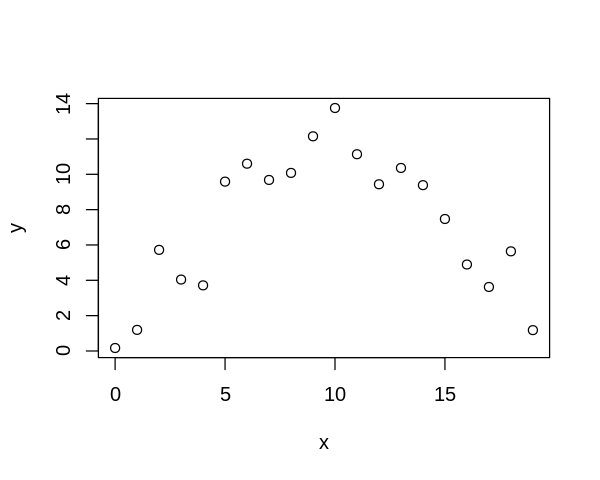

In [38]:
set.seed(8764)
x <- 0:19
y <- -0.1*x^2 + 2*x + 1 + rnorm(20, sd=2)
plot(x,y)

This model is obviously not linear in $x$. However, we can still use linear regression here. 

Create new variables: $x_1 \equiv x$ and $x_2 \equiv x^2$.

Then we can set up a linear model with two independent variables as before.

In [47]:
x1 <- x
x2 <- x^2
quadmodel <- lm(y~x1+x2, data=data.frame(x1,x2,y))
quadmodel


Call:
lm(formula = y ~ x1 + x2, data = data.frame(x1, x2, y))

Coefficients:
(Intercept)           x1           x2  
    -0.4860       2.3705      -0.1202  


The estimated model is $\hat{y} = -0.1202x^2 + 2.3705x-0.4860$, while the truth was $y=-0.1x^2 + 2x -1 $.

We cannot plot the fitted curve directly with `abline()`. Instead, we need to extract the model coefficients and set up a predictions vector with it.

In [40]:
quadmodel$coefficients

(Intercept)          x1          x2 
 -0.4859914   2.3704527  -0.1201814

In [42]:
a <- quadmodel$coefficients["x1"]
b <- quadmodel$coefficients["x2"]
c <- quadmodel$coefficients["(Intercept)"]
c(a,b,c)

x1          x2 (Intercept) 
  2.3704527  -0.1201814  -0.4859914

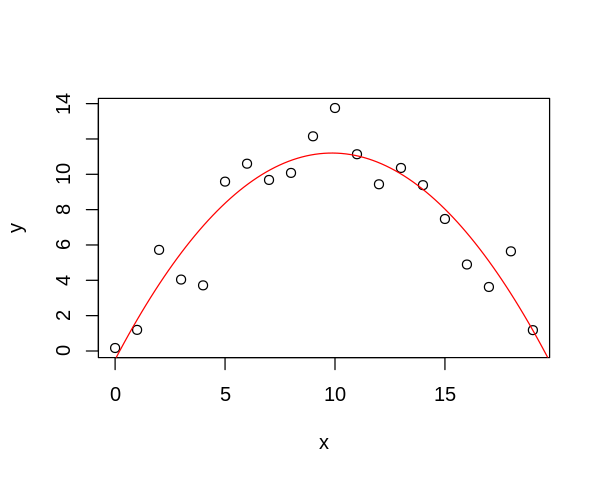

In [43]:
xp <- seq(0,20,length.out = 100)
yp <- a*xp + b*xp^2 + c
plot(x,y)
lines(xp,yp, col="red")

In [44]:
summary(quadmodel)


Call:
lm(formula = y ~ x1 + x2, data = data.frame(x1, x2, y))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3577 -0.8349  0.0507  1.0750  2.5515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.48599    0.96133  -0.506     0.62    
x1           2.37045    0.23452  10.108 1.32e-08 ***
x2          -0.12018    0.01192 -10.086 1.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.579 on 17 degrees of freedom
Multiple R-squared:  0.8592,	Adjusted R-squared:  0.8427 
F-statistic: 51.88 on 2 and 17 DF,  p-value: 5.789e-08


In [45]:
confint(quadmodel)

,2.5 %,97.5 %
(Intercept),-2.5142103,1.54222740
x1,1.8756591,2.86524640
x2,-0.1453202,-0.09504259
